# Titanic Predictions #1

My first time learn about prediction using Titanic dataset and reference code from kaggle

#### Sources:
* Titanic Survival Predictions (Beginner)(https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner/comments)

## 1) Import Necessary Libraries
First, we need to import certain libraries.

In [1]:
#data analysis
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2) Read Data
Import train and test dataset into this kernel

In [2]:
#import train and test CSV files
train = pd.read_csv("...\train.csv")
test = pd.read_csv("...\test.csv")


In [3]:
#take a look at the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3) Data Analysis
Define features, data type and null information.

In [4]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S


In [5]:
#Print column and datatype
print(train.columns, "\n")
print(train.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Here we get the summary to categorize the columns:

* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

Check detail unique data

In [6]:

print("Categorical Features for Survived: ", train.Survived.unique().tolist(), "\n")
print("Categorical Features for Sex: ", train.Sex.unique().tolist(), "\n")
print("Categorical Features for Embarked: ", train.Embarked.unique().tolist(), "\n")
print("Categorical Features for Pclass}: ", train.Pclass.unique().tolist(), "\n")

print("Numerical Features for Age: ", train.Age.unique().tolist(), "\n")
print("Numerical Features for Fare: ", train.Fare.unique().tolist(), "\n")
print("Numerical Features for SibSp: ", train.SibSp.unique().tolist(), "\n")
print("Numerical Features for Parch: ", train.Parch.unique().tolist(), "\n")
print("Numerical Features for Cabin: ", train.Cabin.unique().tolist(), "\n")

Categorical Features for Survived:  [0, 1] 

Categorical Features for Sex:  ['male', 'female'] 

Categorical Features for Embarked:  ['S', 'C', 'Q', nan] 

Categorical Features for Pclass}:  [3, 1, 2] 

Numerical Features for Age:  [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0, 40.0, 66.0, 42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5, 5.0, 11.0, 45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0, 23.0, 24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0, 36.5, 51.0, 55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5, 20.5, 62.0, 41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0, 13.0, 48.0, 0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5, 0.42, 34.5, 74.0] 

Numerical Features for Fare:  [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 31.275, 7.8542, 16.0, 29.125, 13.0, 18.0, 7.225, 26.0, 8.0292, 35.5, 31.3875, 263.0, 7.8792, 7.8958, 27.7208, 146.5208, 

In [7]:
#check for any other null values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We are going to take a look on Age, Cabin, and Embarked first

In [8]:
train_desc = train.describe(include = "all")

In [9]:
train_desc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andreasson, Mr. Paul Edvin",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN


In [10]:
print("% Train's Missing Data in Age: ", 100 - train_desc['Age'].iloc[0] / train_desc['PassengerId'].iloc[0] * 100)
print("% Train's Missing Data in Cabin: ", 100 - train_desc['Cabin'].iloc[0] / train_desc['PassengerId'].iloc[0] * 100)
print("% Train's Missing Data in Embarked: ", 100 - train_desc['Embarked'].iloc[0] / train_desc['PassengerId'].iloc[0] * 100)

% Train's Missing Data in Age:  19.86531986531986
% Train's Missing Data in Cabin:  77.10437710437711
% Train's Missing Data in Embarked:  0.22446689113355944


Take a look at test data

In [11]:
test_desc = test.describe(include = "all")

In [12]:
test_desc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.0,418.00000,418,418,332.00000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Goldsmith, Mr. Nathan",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.5,2.26555,NaN,NaN,30.27259,0.447368,0.392344,NaN,35.627188,NaN,NaN


In [13]:
print("% Test's Missing Data in Age: ", 100 - test_desc['Age'].iloc[0] / test_desc['PassengerId'].iloc[0] * 100)
print("% Test Data in Cabin: ", 100 - test_desc['Cabin'].iloc[0] / test_desc['PassengerId'].iloc[0] * 100)
print("% Test Data in Fare: ", 100 - test_desc['Fare'].iloc[0] / test_desc['PassengerId'].iloc[0] * 100)

% Test's Missing Data in Age:  20.57416267942584
% Test Data in Cabin:  78.22966507177034
% Test Data in Fare:  0.23923444976075814


## 4) Data Visualization
Visualize the data from train to check the pattern of survival person based on several dimensions

### Visualization: Sex

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


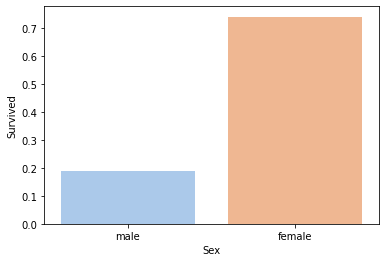

In [14]:
sns.barplot(x="Sex", y="Survived", data=train, ci = 0, palette  = "pastel")

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Gender female are more likely survive than male

### Visualization: Pclass

Percentage of Pclass 1 who survived: 62.96296296296296
Percentage of Pclass 2 who survived: 47.28260869565217
Percentage of Pclass 3 who survived: 24.236252545824847


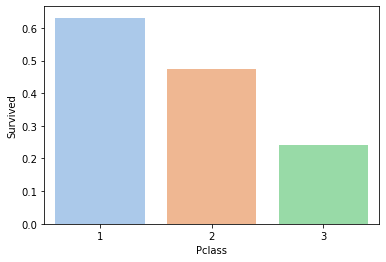

In [15]:
sns.barplot(x="Pclass", y="Survived", data=train, ci = 0, palette  = "pastel")

print("Percentage of Pclass 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Passenger with Pclass 1 are more likely to survive than others

### Visualization: Embarked

Percentage of Cherbourg who survived: 55.35714285714286
Percentage of Southampton who survived: 33.69565217391305
Percentage of Queenstown who survived: 38.961038961038966
Percentage of No Data who survived: 100.0


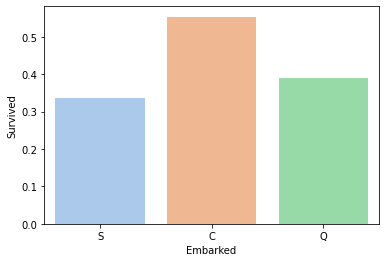

In [16]:
sns.barplot(x="Embarked", y="Survived", data=train, ci = 0, palette  = "pastel")

print("Percentage of Cherbourg who survived:", train["Survived"][train["Embarked"] == "C"].value_counts(normalize = True)[1]*100)

print("Percentage of Southampton who survived:", train["Survived"][train["Embarked"] == "S"].value_counts(normalize = True)[1]*100)

print("Percentage of Queenstown who survived:", train["Survived"][train["Embarked"] == "Q"].value_counts(normalize = True)[1]*100)

print("Percentage of No Data who survived:", train["Survived"][train["Embarked"].isnull()].value_counts(normalize = True)[1]*100)


Passenger from Cherbourg are more likely to survive. All People with no Pclass are survived

### Visualization: SibSp

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


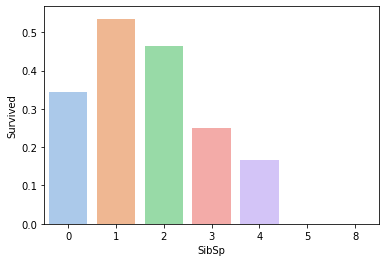

In [17]:
sns.barplot(x="SibSp", y="Survived", data=train, ci = 0, palette  = "pastel")

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Passenger with siblings are more likely to survive rather than alone passenger

### Visualization: Parch

Percentage of Parch =  0  who survived: 34.365781710914455
Percentage of Parch =  1  who survived: 55.08474576271186
Percentage of Parch =  2  who survived: 50.0
Percentage of Parch =  3  who survived: 60.0
Percentage of Parch =  4  who survived: 0
Percentage of Parch =  5  who survived: 20.0
Percentage of Parch =  6  who survived: 0


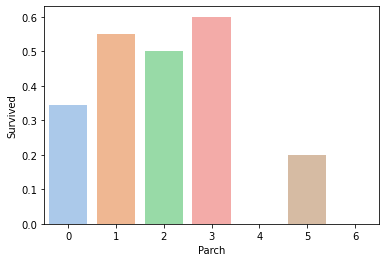

In [18]:
sns.barplot(x="Parch", y="Survived", data=train, ci = 0, palette  = "pastel")


for i in range (len(train.Parch.unique().tolist())):
    if 1 < len(train["Survived"][train["Parch"] == i].value_counts(normalize = True)):
        print("Percentage of Parch = ",i ," who survived:", train["Survived"][train["Parch"] == i].value_counts(normalize = True)[1]*100)
    else:
        print("Percentage of Parch = ",i ," who survived: 0")
    

Passenger with 1 - 3 parents are more likely to survive rather than alone passenger

### Visualization: Age

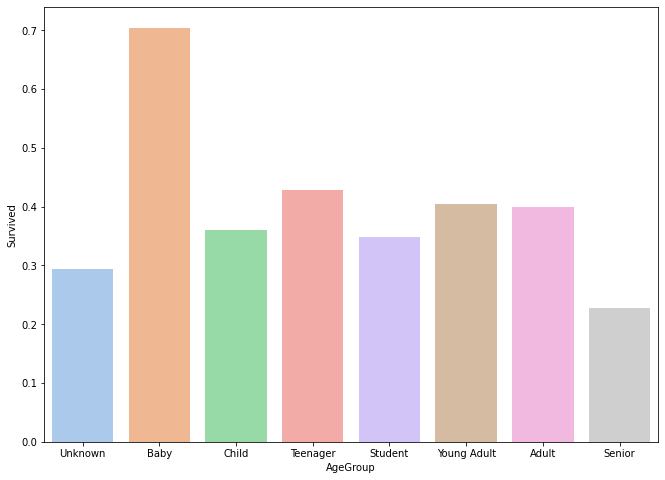

In [19]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

dims = (11, 8)
fig, ax = plt.subplots(figsize = dims)
sns.barplot(x="AgeGroup", y="Survived", data=train, ci = 0, palette  = "pastel")
plt.show()

Baby are more likely to survive than others

### Visualization: Cabin

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


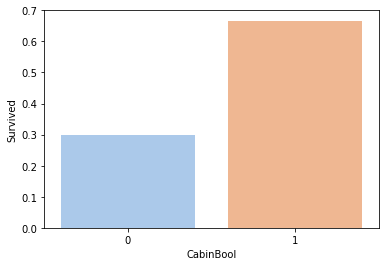

In [20]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train, ci = 0, palette  = "pastel")
plt.show()

Passenger with cabin are more likely to survive than passenger with no cabin

## 5) Data Preparation
Data preparation for model prediction (Train & Test). Fulfill null value if necessary.

In [21]:
train_desc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andreasson, Mr. Paul Edvin",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN


**Keep**
* PassengerID
* Survived
* PcClass
* Sex
* Age
* SibSp
* Parch
* Fare
* Embarked
    
    
**Drop**
* Name
* Cabin
* Ticket

### Data Preparation: Embarked
Fill the null embarked with the most embarked

In [22]:
emb_var = train.Embarked.unique().tolist()

for i in range (len(emb_var)):
    print("Number of people embarking in", emb_var[i], train[train["Embarked"] == emb_var[i]].shape[0])


Number of people embarking in S 644
Number of people embarking in C 168
Number of people embarking in Q 77
Number of people embarking in nan 0


Replacing the missing values in the Embarked feature with the highest total passenger. S with 644 pasenger

In [23]:

train = train.fillna({"Embarked": "S"})

In [24]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,Young Adult,0


### Data Preparation: Age
Fill the null in age column

Combine and take the title based on name column

In [25]:

combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [26]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
check_age = train[train["Age"] != -0.5] 

In [28]:
check_age = pd.merge( check_age.groupby(["Title"])["Age"].max(), check_age.groupby(["Title"])["Age"].min(), left_index = True, right_index = True).reset_index()

See the range each title

In [29]:
check_age.head(100)

,Title,Age_x,Age_y
0,Capt,70.0,70.00
1,Col,60.0,56.00
2,Countess,33.0,33.00
3,Don,40.0,40.00
4,Dr,54.0,23.00
5,Jonkheer,38.0,38.00
6,Lady,48.0,48.00
7,Major,52.0,45.00
8,Master,12.0,0.42
9,Miss,63.0,0.75


Simplify the title into small group

In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [31]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [32]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,Young Adult,0,1


Fill the missing age by mode each group

In [34]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

In [35]:
[mr_age, 
miss_age,
mrs_age,
master_age,
royal_age,
rare_age]

[0    Young Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Unknown
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Baby
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']]

In [36]:
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [37]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,5.0,0,1


In [38]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### Data Preparation: Sex

In [39]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,NaN,1,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,2,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,NaN,1,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,1,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,NaN,1,5.0,0,1


### Data Preparation: Fare
Fill the null value in Fare column on test dataset. Find the mean of fare in train dataset based on Pclass

In [40]:
#find the null value in fare
test[test["Fare"].isnull() ==True]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
152,1044,3,"Storey, Mr. Thomas",0,0,0,3701,NaN,NaN,1,7.0,0,1.0


In [41]:
train.groupby(["Pclass"])["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [42]:
#fill the fare column in test data by mean fare in train data
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x]
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)


In [43]:
#see the result
test[test["PassengerId"] ==1044]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
152,1044,3,"Storey, Mr. Thomas",0,0,0,3701,13.6756,NaN,1,7.0,0,1.0


In [44]:
#Categorize fare with 4 levels
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [45]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

### Drop Unecessary Column

In [46]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [47]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [48]:
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
FareBand       0
dtype: int64


In [49]:
#check test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1.0,1
1,893,3,1,1,0,1,6.0,0,3.0,1
2,894,2,0,0,0,3,7.0,0,1.0,2
3,895,3,0,0,0,1,5.0,0,1.0,2
4,896,3,1,1,1,1,4.0,0,3.0,2


In [50]:
print(pd.isnull(test).sum())

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
FareBand       0
dtype: int64


## 6) Choosing Model


22 % training data to test the accuracy of certain testing models.

In [51]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

### Testing Models

* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier


In [52]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


In [54]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

83.25


In [55]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


In [56]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

77.66


In [57]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.7


In [58]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

85.28


In [59]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [60]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

40.1


In [61]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.26


In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.28
9,Gradient Boosting Classifier,84.26
0,Support Vector Machines,83.25
2,Logistic Regression,79.70
7,Decision Tree,79.70
4,Naive Bayes,78.68
6,Linear SVC,78.17
1,KNN,77.66
5,Perceptron,77.66
8,Stochastic Gradient Descent,40.10


## 7) Creating Submission File

Using Random Forest as the highest score

In [63]:
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)